<a href="https://colab.research.google.com/github/GustavoRosso/PythonEMercadoFinanceiro/blob/main/CAP%C3%8DTULO_13_INTELIG%C3%8ANCIA_ARTIFICIAL_NO_GOOGLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAPÍTULO 13 - INTELIGÊNCIA ARTIFICIAL NO GOOGLE

#Explicação

##13.2 LÓGICA FUZZY NO PYTHON


In [3]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=ffadb7122e874a074b324d91f2cb1be56bfc4d1f56bfb30f6b508149575e20ef
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


671.98579243603
[['comprar', 0.0], ['manter', 0.28014207563969995], ['vender', 0.35992896218015]]
++++++++++++++++++++++ DecisÃ£o Final ++++++++++++++++++++++
vender
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


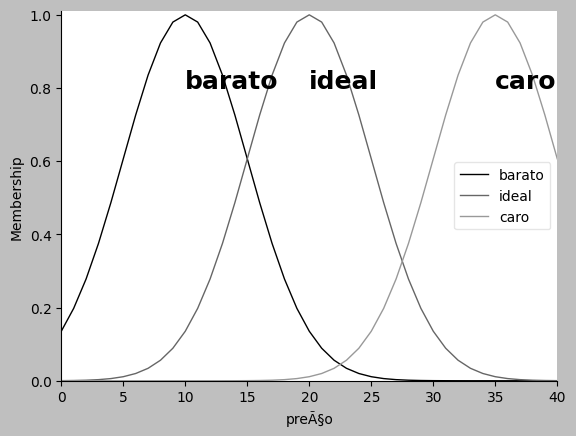

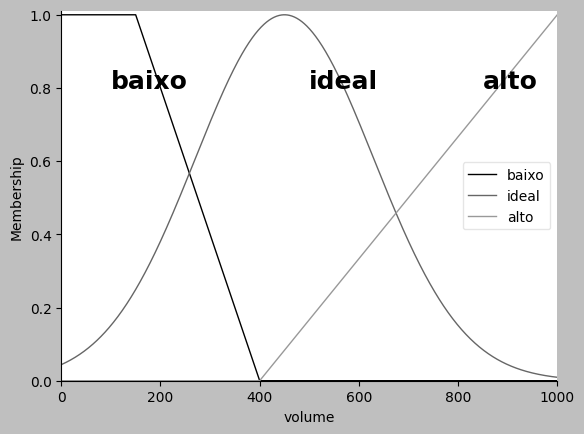

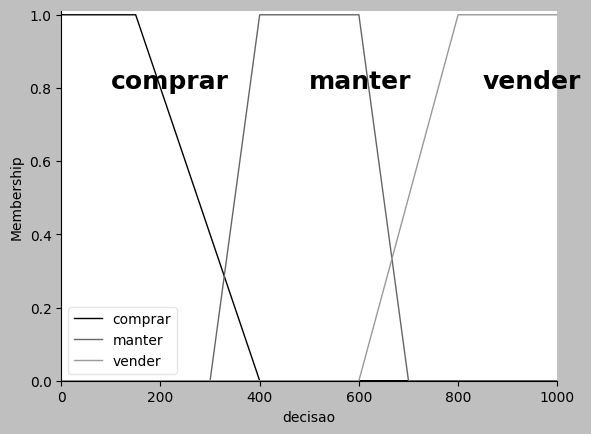

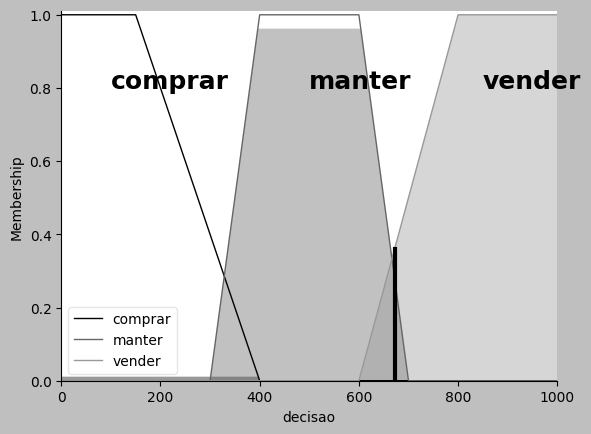

In [4]:
# 13.2 LÓGICA FUZZY NO PYTHON

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('grayscale')
#++++++++++++++++++ Eixo das abdcissas para as fun. pertinentes +++++++++
preco = ctl.Antecedent(np.arange(0,41,1), 'preÃ§o')
vol = ctl.Antecedent(np.arange(0,1001,1), 'volume')
dec = ctl.Consequent(np.arange(0,1001,1), 'decisao')

#++++++++++++++++++ FunÃ§Ã£o de pertinencia para preÃ§os +++++++++++++++++++
preco['barato'] = fuzz.gaussmf(preco.universe,10,5)
preco['ideal'] = fuzz.gaussmf(preco.universe,20,5)
preco['caro'] = fuzz.gaussmf(preco.universe,35,5)
preco.view()
plt.text(x = 10, y = 0.8, s = 'barato', fontsize = 18, weight = 'bold')
plt.text(x = 20, y = 0.8, s = 'ideal', fontsize = 18, weight = 'bold')
plt.text(x = 35, y = 0.8, s = 'caro', fontsize = 18, weight = 'bold')

#++++++++++++++++++ FunÃ§Ã£o de pertinencia para volume +++++++++++++++++++
vol['baixo'] = fuzz.trapmf(vol.universe,[0,0,150,400])
vol['ideal'] = fuzz.gaussmf(vol.universe,450,180)
vol['alto'] = fuzz.trimf(vol.universe,[400,1000,1000])
vol.view()
plt.text(x = 100, y = 0.8, s = 'baixo', fontsize = 18, weight = 'bold')
plt.text(x = 500, y = 0.8, s = 'ideal', fontsize = 18, weight = 'bold')
plt.text(x = 850, y = 0.8, s = 'alto', fontsize = 18, weight = 'bold')

#++++++++++++++++++ FunÃ§Ã£o de pertinencia para decisÃ£o final ++++++++++++
dec['comprar'] = fuzz.trapmf(dec.universe,[0,0,150,400])
dec['manter'] = fuzz.trapmf(dec.universe,[300,400,600,700])
dec['vender'] = fuzz.trapmf(dec.universe,[600,800,1000,1000])
dec.view()
plt.text(x = 100, y = 0.8, s = 'comprar', fontsize = 18, weight = 'bold')
plt.text(x = 500, y = 0.8, s = 'manter', fontsize = 18, weight = 'bold')
plt.text(x = 850, y = 0.8, s = 'vender', fontsize = 18, weight = 'bold')

#+++++++++++++++++++++++ REGRAS DA LOGICA FUZZY +++++++++++++++++++++++++
regra1 = ctl.Rule(preco['barato'] & vol['baixo'], dec['comprar'])
regra2 = ctl.Rule(preco['barato'] & vol['alto'], dec['comprar'])
regra3 = ctl.Rule(preco['ideal'] | vol['baixo'], dec['comprar'])
regra4 = ctl.Rule(preco['ideal'] | vol['ideal'], dec['manter'])
regra5 = ctl.Rule(preco['ideal'] | vol['alto'], dec['vender'])
regra6 = ctl.Rule(preco['caro'] | vol['alto'], dec['vender'])

#++++++++++++++ Sistema de criaÃ§Ã£o de controle/simulaÃ§Ã£o ++++++++++++++++
decisao_ctl = ctl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6])
decisao = ctl.ControlSystemSimulation(decisao_ctl)

#+++++++++ FunÃ§Ã£o de cÃ¡lculo para o defuzzificaÃ§Ã£o ++++++++++++++++++++++
def IndFzy(entrada):
    #Entrada
    decisao.input['preÃ§o'] = entrada[0]
    decisao.input['volume'] = entrada[1]
    #SaÃ­da fuzzy
    decisao.compute()
    return(decisao.output['decisao'])

#======================= Valor fuzzy computado ++++++++++++++++++++++++++

res1 = IndFzy([35,400])
print(res1)
dec.view(sim = decisao)
plt.text(x = 100, y = 0.8, s = 'comprar', fontsize = 18, weight = 'bold')
plt.text(x = 500, y = 0.8, s = 'manter', fontsize = 18, weight = 'bold')
plt.text(x = 850, y = 0.8, s = 'vender', fontsize = 18, weight = 'bold')
#++++++++++++++++++++++++++++++++ DecisÃ£o Final +++++++++++++++++++++++++

mval = []
for t in dec.terms:
    s = np.interp(res1, dec.universe, dec[t].mf)
    mval.append([t,s])
print(mval)
mval = pd.DataFrame(mval)
ind_max = mval[1].idxmax()
print('++++++++++++++++++++++ DecisÃ£o Final ++++++++++++++++++++++')
print(mval[0][ind_max])
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

##13.3 INTELIGÊNCIA ARTIFICIAL NA BOVESPA

TypeError: ignored

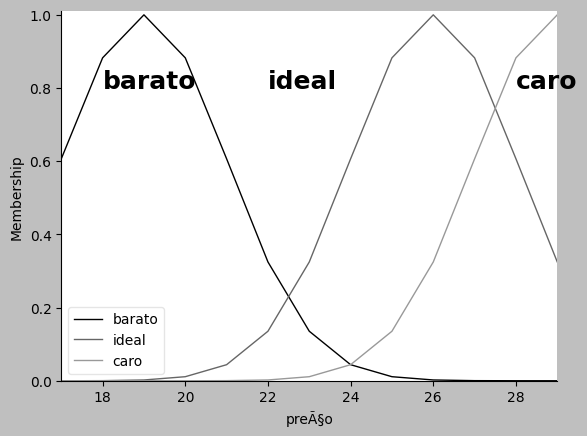

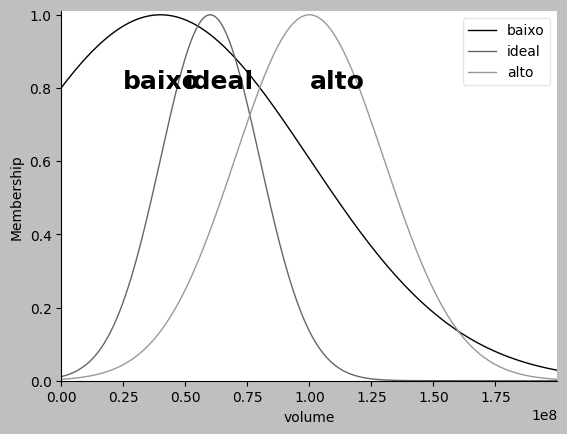

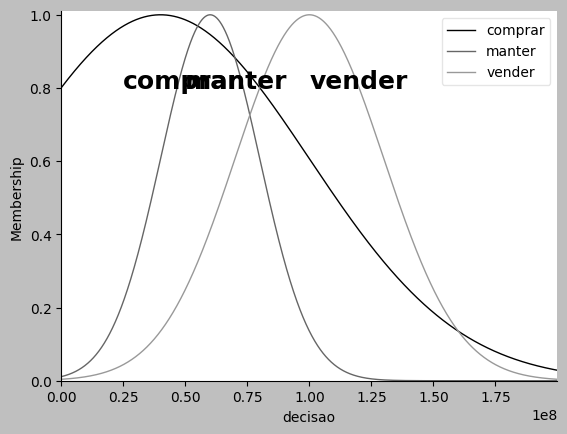

In [5]:
# 13.3 INTELIGÊNCIA ARTIFICIAL NA BOVESPA
# A um problema no servidor do Yahoo

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import pandas_datareader.data as web
import datetime as dt


plt.style.use('grayscale')
#++++++++++++++++++ Eixo das abdcissas para as fun. pertinentes +++++++++
preco = ctl.Antecedent(np.arange(17,30,1), 'preÃ§o')
vol = ctl.Antecedent(np.arange(0,2e8,1e5), 'volume')
dec = ctl.Consequent(np.arange(0,2e8,1e5), 'decisao')

#++++++++++++++++++ FunÃ§Ã£o de pertinencia para preÃ§os +++++++++++++++++++
preco['barato'] = fuzz.gaussmf(preco.universe,19,2)
preco['ideal'] = fuzz.gaussmf(preco.universe,26,2)
preco['caro'] = fuzz.gaussmf(preco.universe,29,2)
preco.view()
plt.text(x = 18, y = 0.8, s = 'barato', fontsize = 18, weight = 'bold')
plt.text(x = 22, y = 0.8, s = 'ideal', fontsize = 18, weight = 'bold')
plt.text(x = 28, y = 0.8, s = 'caro', fontsize = 18, weight = 'bold')

#++++++++++++++++++ FunÃ§Ã£o de pertinencia para volume +++++++++++++++++++
vol['baixo'] = fuzz.gaussmf(vol.universe,0.4e8,6e7)
vol['ideal'] = fuzz.gaussmf(vol.universe,0.6e8,2e7)
vol['alto'] = fuzz.gaussmf(vol.universe,1e8,3e7)
vol.view()
plt.text(x = 0.25e8, y = 0.8, s = 'baixo', fontsize = 18, weight = 'bold')
plt.text(x = 0.5e8, y = 0.8, s = 'ideal', fontsize = 18, weight = 'bold')
plt.text(x = 1e8, y = 0.8, s = 'alto', fontsize = 18, weight = 'bold')

#++++++++++++++++++ FunÃ§Ã£o de pertinencia para decisÃ£o final ++++++++++++
dec['comprar'] = fuzz.gaussmf(dec.universe,0.4e8,6e7)
dec['manter'] = fuzz.gaussmf(dec.universe,0.6e8,2e7)
dec['vender'] = fuzz.gaussmf(dec.universe,1e8,3e7)
dec.view()
plt.text(x = 0.25e8, y = 0.8, s = 'comprar', fontsize = 18, weight = 'bold')
plt.text(x = 0.5e8, y = 0.8, s = 'manter', fontsize = 18, weight = 'bold')
plt.text(x = 1e8, y = 0.8, s = 'vender', fontsize = 18, weight = 'bold')

#+++++++++++++++++++++++ REGRAS DA LOGICA FUZZY +++++++++++++++++++++++++
regra1 = ctl.Rule(preco['barato'] & vol['baixo'], dec['comprar'])
regra2 = ctl.Rule(preco['barato'] & vol['alto'], dec['comprar'])
regra3 = ctl.Rule(preco['ideal'] | vol['baixo'], dec['comprar'])
regra4 = ctl.Rule(preco['ideal'] | vol['ideal'], dec['manter'])
regra5 = ctl.Rule(preco['ideal'] | vol['alto'], dec['vender'])
regra6 = ctl.Rule(preco['caro'] | vol['alto'], dec['vender'])

#++++++++++++++ Sistema de criaÃ§Ã£o de controle/simulaÃ§Ã£o ++++++++++++++++
decisao_ctl = ctl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6])
decisao = ctl.ControlSystemSimulation(decisao_ctl)

#+++++++++ FunÃ§Ã£o de cÃ¡lculo para o defuzzificaÃ§Ã£o ++++++++++++++++++++++
def IndFzy(entrada):
    #Entrada
    decisao.input['preÃ§o'] = entrada[0]
    decisao.input['volume'] = entrada[1]
    #SaÃ­da fuzzy
    decisao.compute()
    return(decisao.output['decisao'])

#======================= Valor fuzzy computado ++++++++++++++++++++++++++

#++++++++++++++++++++++++++++++++ DecisÃ£o Final +++++++++++++++++++++++++
inicio = dt.datetime(2019, 3, 1)
fim = dt.datetime(2019, 5, 15)
df = web.DataReader('PETR4.SA','yahoo',inicio,fim)
mval = np.zeros((len(df),3))
for i in range(len(df)):
    res1 = IndFzy([df['Close'].values[i],df['Volume'].values[i]])
    j = 0
    for t in dec.terms:
        s = np.interp(res1, dec.universe, dec[t].mf)
        mval[i,j] = s
        j = j + 1

mval = pd.DataFrame(mval, columns = ['comprar', 'manter', 'vender'])
dec_fuzzy = mval.idxmax(axis=1)
print('++++++++++++++++++++++ DecisÃ£o Final ++++++++++++++++++++++')
print(dec_fuzzy)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

dec.view(sim = decisao)
plt.text(x = 0.25e8, y = 0.8, s = 'comprar', fontsize = 18, weight = 'bold')
plt.text(x = 0.5e8, y = 0.8, s = 'manter', fontsize = 18, weight = 'bold')
plt.text(x = 0.1e8, y = 0.8, s = 'vender', fontsize = 18, weight = 'bold')

figura = plt.figure()
ax1 = plt.subplot(111)
plt.title('Petrobras - PETR4')

ax1.plot(df.index,df['Close'], '--k')
ax1.set_ylabel('PETR4', fontsize = 18, weight = 'bold')
for i in range(len(dec_fuzzy)):
    ax1.text(x = df.index[i], y = df['Close'].values[i], s = str(dec_fuzzy[i]),
             fontsize = 12, color = 'black', weight = 'bold')

ax2 = ax1.twinx()
ax2.plot(df.index,df['Volume'], color = 'black')
ax2.set_ylabel('VOLUME',fontsize = 18, weight = 'bold')

## 13.4 INFLUÊNCIA DAS MÍDIAS SOCIAIS NOS ATIVOS DO MERCADO


In [7]:
pip install pytrends

TypeError: ignored

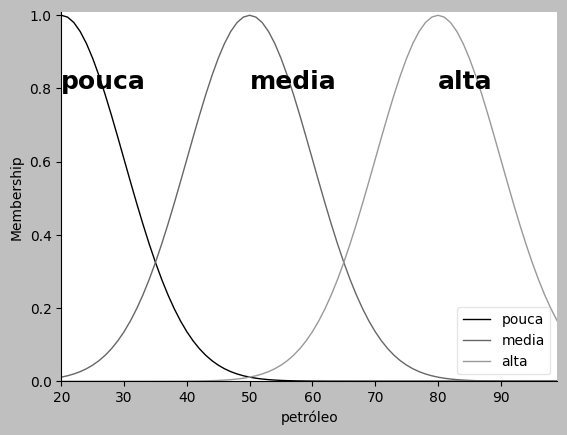

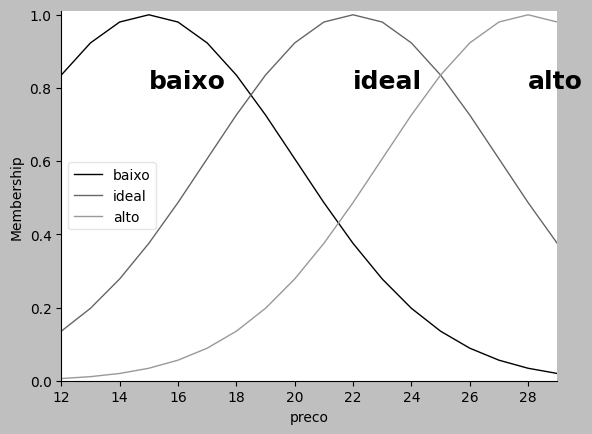

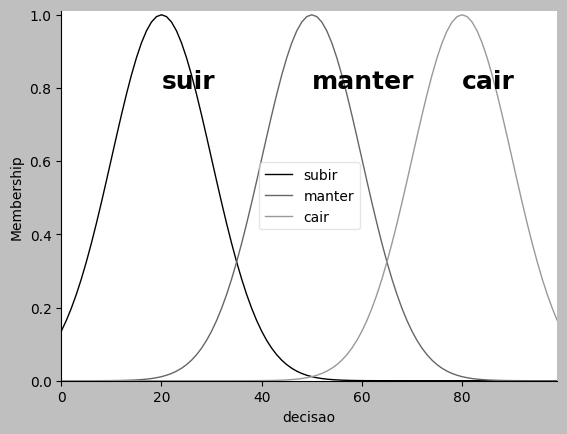

In [8]:
# 13.4 INFLUÊNCIA DAS MÍDIAS SOCIAIS NOS ATIVOS DO MERCADO
# A um problema no servidor do Yahoo

###################################################################
#      Comparação entre preços e google trends
###################################################################

from pytrends.request import TrendReq
import matplotlib.dates as mdates
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.style.use('grayscale')
#++++++++++++++++++ Eixo das abdcissas para as fun. pertinentes +++++++++
palavra = ctl.Antecedent(np.arange(20,100,1), 'petróleo')
preco = ctl.Antecedent(np.arange(12,30,1), 'preco')
dec = ctl.Consequent(np.arange(0,100,1), 'decisao')

#++++++++++++++++++ Função de pertinencia para preços +++++++++++++++++++
palavra['pouca'] = fuzz.gaussmf(palavra.universe,20,10)
palavra['media'] = fuzz.gaussmf(palavra.universe,50,10)
palavra['alta'] = fuzz.gaussmf(palavra.universe,80,10)
palavra.view()
plt.text(x = 20, y = 0.8, s = 'pouca', fontsize = 18, weight = 'bold')
plt.text(x = 50, y = 0.8, s = 'media', fontsize = 18, weight = 'bold')
plt.text(x = 80, y = 0.8, s = 'alta', fontsize = 18, weight = 'bold')

#++++++++++++++++++ Função de pertinencia para volume +++++++++++++++++++
preco['baixo'] = fuzz.gaussmf(preco.universe,15,5)
preco['ideal'] = fuzz.gaussmf(preco.universe,22,5)
preco['alto'] = fuzz.gaussmf(preco.universe,28,5)
preco.view()
plt.text(x = 15, y = 0.8, s = 'baixo', fontsize = 18, weight = 'bold')
plt.text(x = 22, y = 0.8, s = 'ideal', fontsize = 18, weight = 'bold')
plt.text(x = 28, y = 0.8, s = 'alto', fontsize = 18, weight = 'bold')

#++++++++++++++++++ Função de pertinencia para decisão final ++++++++++++
dec['subir'] = fuzz.gaussmf(dec.universe,20,10)
dec['manter'] = fuzz.gaussmf(dec.universe,50,10)
dec['cair'] = fuzz.gaussmf(dec.universe,80,10)
dec.view()
plt.text(x = 20, y = 0.8, s = 'suir', fontsize = 18, weight = 'bold')
plt.text(x = 50, y = 0.8, s = 'manter', fontsize = 18, weight = 'bold')
plt.text(x = 80, y = 0.8, s = 'cair', fontsize = 18, weight = 'bold')

#+++++++++++++++++++++++ REGRAS DA LOGICA FUZZY +++++++++++++++++++++++++
regra1 = ctl.Rule(palavra['pouca'] & preco['baixo'], dec['manter'])
regra2 = ctl.Rule(palavra['pouca'] & preco['alto'], dec['cair'])
regra3 = ctl.Rule(palavra['media'] | preco['baixo'], dec['cair'])
regra4 = ctl.Rule(palavra['media'] | preco['ideal'], dec['subir'])
regra5 = ctl.Rule(palavra['alta'] | preco['baixo'], dec['subir'])
regra6 = ctl.Rule(palavra['alta'] | preco['alto'], dec['subir'])

#++++++++++++++ Sistema de criação de controle/simulação ++++++++++++++++
decisao_ctl = ctl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6])
decisao = ctl.ControlSystemSimulation(decisao_ctl)

#+++++++++ Função de cálculo para o defuzzificação ++++++++++++++++++++++
def IndFzy(entrada):
    #Entrada
    decisao.input['petróleo'] = entrada[0]
    decisao.input['preco'] = entrada[1]
    #Saída fuzzy
    decisao.compute()
    return(decisao.output['decisao'])

#======================= Valor fuzzy computado ++++++++++++++++++++++++++

#++++++++++++++++++++++++++++++++ Decisão Final +++++++++++++++++++++++++
inicio = dt.datetime(2018, 12, 1)
fim = dt.datetime(2019, 12, 7)
df = web.DataReader('PETR4.SA','yahoo',inicio,fim)
#-------------- MEDIA SEMANAL DOS PRECOS PARA ADEQUAR AO GOOGLE ---------
med = df['Close'].resample('w').mean()

#+++++++++++++++++++++ Conexão com o servidor +++++++++++++++++++++++++++
pytrends = TrendReq(hl = 'en-US', tz = 360)
#+++++++++++++++++++++ Lista com palavra-chave ++++++++++++++++++++++++++
kw_list = ['petróleo']
#++++++++++++++++++++++++ Download google trends ++++++++++++++++++++++++
pytrends.build_payload(kw_list, cat = 0,
                       timeframe = '2018-12-01 2019-12-07',
                       geo = 'BR', gprop = '')
teste = pytrends.interest_over_time()
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
mval = np.zeros((len(med),3))
for i in range(len(med)):
    res1 = IndFzy([teste['petróleo'].values[i],med.values[i]])
    j = 0
    for t in dec.terms:
        s = np.interp(res1, dec.universe, dec[t].mf)
        mval[i,j] = s
        j = j + 1

mval = pd.DataFrame(mval, columns = ['suir', 'manter', 'cair'])
dec_fuzzy = mval.idxmax(axis=1)
print('++++++++++++++++++++++ Decisão Final ++++++++++++++++++++++')
print(dec_fuzzy)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

dec.view(sim = decisao)
plt.text(x = 20, y = 0.8, s = 'comprar', fontsize = 18, weight = 'bold')
plt.text(x = 50, y = 0.8, s = 'manter', fontsize = 18, weight = 'bold')
plt.text(x = 80, y = 0.8, s = 'vender', fontsize = 18, weight = 'bold')

figura = plt.figure()
ax1 = plt.subplot(111)
plt.title('Petrobras - PETR4')

ax1.plot(med.index, med.values, '--k')
ax1.set_ylabel('PETR4', fontsize = 18, weight = 'bold')
for i in range(len(dec_fuzzy)):
    ax1.text(x = med.index[i], y = med.values.values[i], s = str(dec_fuzzy[i]),
             fontsize = 12, color = 'black', weight = 'bold')

ax2 = ax1.twinx()
ax2.plot(teste.index,teste['petróleo'], color = 'black', linewidth = 3)
ax2.set_ylabel('Google trends - "Petróleo" ',fontsize = 18, weight = 'bold')

##13.5 INTELIGÊNCIA ARTIFICIAL COMO SENSOR DE INSATISFAÇÃO DO MERCADO


++++++++++++++++++++++ Decisão Final ++++++++++++++++++++++
0       alto
1       alto
2       alto
3       alto
4       alto
       ...  
200     alto
201    medio
202     alto
203    medio
204    medio
Length: 205, dtype: object
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


<ipython-input-9-b3acf92158ec>:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(teste[kw_list[0]],'--k', teste[kw_list[1]],'--k', teste[kw_list[2]],'--k',


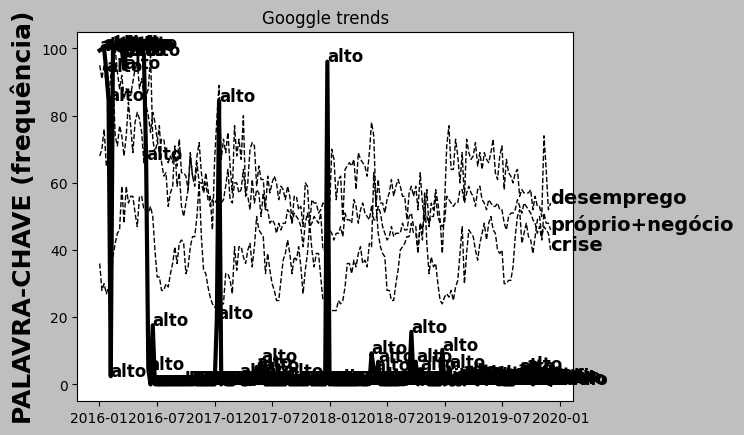

In [9]:
# 13.5 INTELIGÊNCIA ARTIFICIAL COMO SENSOR DE INSATISFAÇÃO DO MERCADO
# A um problema no servidor do Yahoo

###################################################################
#      Comparação entre preços e google trends
###################################################################

from pytrends.request import TrendReq
import matplotlib.dates as mdates
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.style.use('grayscale')
#++++++++++++++++++ Eixo das abdcissas para as fun. pertinentes +++++++++
crise = ctl.Antecedent(np.arange(0,100,1), 'crise')
desp = ctl.Antecedent(np.arange(0,100,1), 'desemprego')
neg = ctl.Antecedent(np.arange(0,100,1), 'negócio')
dec = ctl.Consequent(np.arange(0,100,1), 'decisao')

#++++++++++++++++++ Função de pertinencia para crise ++++++++++++++++++++
crise['baixo'] = fuzz.gaussmf(crise.universe,20,10)
crise['medio'] = fuzz.gaussmf(crise.universe,40,10)
crise['alto'] = fuzz.gaussmf(crise.universe,50,10)
#++++++++++++++++++ Função de pertinencia para desemprego +++++++++++++++
desp['baixo'] = fuzz.gaussmf(desp.universe,50,5)
desp['medio'] = fuzz.gaussmf(desp.universe,60,5)
desp['alto'] = fuzz.gaussmf(desp.universe,70,5)
#++++++++++++++++++ Função de pertinencia para negócio ++++++++++++++++++
neg['baixo'] = fuzz.gaussmf(neg.universe,50,5)
neg['medio'] = fuzz.gaussmf(neg.universe,60,5)
neg['alto'] = fuzz.gaussmf(neg.universe,70,5)
#++++++++++++++++++ Função de pertinencia para decisão final+++++++++++++
dec['baixo'] = fuzz.gaussmf(dec.universe,20,5)
dec['medio'] = fuzz.gaussmf(dec.universe,50,5)
dec['alto'] = fuzz.gaussmf(dec.universe,80,5)
#+++++++++++++++++++++++ REGRAS DA LOGICA FUZZY +++++++++++++++++++++++++
regra1 = ctl.Rule(crise['baixo'] & desp['baixo'] & neg['baixo'], dec['baixo'])
regra2 = ctl.Rule(crise['baixo'] & desp['medio'] & neg['baixo'], dec['baixo'])
regra3 = ctl.Rule(crise['baixo'] & desp['alto'] & neg['baixo'], dec['medio'])
regra4 = ctl.Rule(crise['alto'] & desp['baixo'] & neg['baixo'], dec['medio'])
regra5 = ctl.Rule(crise['alto'] & desp['medio'] & neg['medio'], dec['alto'])
regra6 = ctl.Rule(crise['alto'] & desp['alto'] & neg['baixo'], dec['medio'])
regra7 = ctl.Rule(crise['alto'] & desp['alto'] & neg['alto'], dec['alto'])
regra8 = ctl.Rule(crise['baixo'] & desp['baixo'] | neg['alto'], dec['baixo'])
regra9 = ctl.Rule(crise['baixo'] | desp['alto'] & neg['alto'], dec['alto'])
regra10 = ctl.Rule(crise['alto'] | desp['alto'] | neg['alto'], dec['alto'])
#++++++++++++++ Sistema de criação de controle/simulação ++++++++++++++++
decisao_ctl = ctl.ControlSystem([regra1,regra2,regra3,regra4,
                                 regra5,regra6,regra7,regra8,
                                 regra9,regra10])
decisao = ctl.ControlSystemSimulation(decisao_ctl)

#+++++++++ Função de cálculo para o defuzzificação ++++++++++++++++++++++
def IndFzy(entrada):
    #Entrada
    decisao.input['crise'] = entrada[0]
    decisao.input['desemprego'] = entrada[1]
    decisao.input['negócio'] = entrada[2]
    #Saída fuzzy
    decisao.compute()
    return(decisao.output['decisao'])

#+++++++++++++++++++++ Conexão com o servidor +++++++++++++++++++++++++++
pytrends = TrendReq(hl = 'en-US', tz = 360)
#+++++++++++++++++++++ Lista com palavra-chave ++++++++++++++++++++++++++
kw_list = ['crise','desemprego','próprio+negócio']
#++++++++++++++++++++++++ Download google trends ++++++++++++++++++++++++
pytrends.build_payload(kw_list, cat = 0,
                       timeframe = '2016-01-01 2019-12-07',
                       geo = 'BR', gprop = '')
teste = pytrends.interest_over_time()
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
mval = np.zeros((len(teste),3))
pert = np.zeros(len(teste))
for i in range(len(teste)):
    res1 = IndFzy([teste[kw_list[0]].values[i],teste[kw_list[1]].values[i],
                   teste[kw_list[2]].values[i]])
    pert[i] = res1
    j = 0
    for t in dec.terms:
        s = np.interp(res1, dec.universe, dec[t].mf)
        mval[i,j] = s
        j = j + 1

mval = pd.DataFrame(mval, columns = ['baixo', 'medio', 'alto'])
dec_fuzzy = mval.idxmax(axis=1)
print('++++++++++++++++++++++ Decisão Final ++++++++++++++++++++++')
print(dec_fuzzy)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

ax1 = plt.subplot(111)
plt.title('Googgle trends')

ax1.plot(teste[kw_list[0]],'--k', teste[kw_list[1]],'--k', teste[kw_list[2]],'--k',
         color = 'black', linewidth = 1)
ax1.text(x = teste.index[-1], y = teste[kw_list[0]][-1],s = kw_list[0],
         fontsize = 14, color = 'black',weight = 'bold')
ax1.text(x = teste.index[-1], y = teste[kw_list[1]][-1],s = kw_list[1],
         fontsize = 14, color = 'black',weight = 'bold')
ax1.text(x = teste.index[-1], y = teste[kw_list[2]][-1],s = kw_list[2],
         fontsize = 14, color = 'black',weight = 'bold')
ax1.set_ylabel('PALAVRA-CHAVE (frequência)', fontsize = 18,weight = 'bold')

#+++++++++++++++ Sensor fuzzy de insatisfação da população ++++++++++++++
ax1.plot(teste.index, mval['alto']*100, '-k',linewidth = 3)
for i in range(len(dec_fuzzy)):
         ax1.text(x = teste.index[i], y = mval['alto'][i]*100, s = str(dec_fuzzy[i]),
         fontsize = 12, color = 'black', weight = 'bold')